In [1]:
import numpy
import pickle

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

class DecisionTree(object): 
    def __init__(self, data_file=None, model_file=None, split=0.20):
        self.data_file = data_file
        self.model_file = model_file
        self.data = None
        self.labels = None
        self.split = split
        self.clf = DecisionTreeClassifier()
        self.prediction = None

    def load_data(self):
        dataset = numpy.loadtxt(self.data_file, delimiter=",", dtype='float64')
        self.data = dataset[:,0:3]
        self.labels = dataset[:,3]

    def train(self, metrics=True):
        x_train, x_test, y_train, y_test = train_test_split(self.data, self.labels, test_size=self.split)
        self.clf.fit(x_train, y_train)
        
        if metrics:
            y_pred = self.clf.predict(x_test)  
            print(confusion_matrix(y_test, y_pred))  
            print(classification_report(y_test, y_pred))

    def predict(self, features, verbose=True):
        # test = numpy.array([[131, 65.5, 2]])
        # test1 = numpy.array([[36, 18.0, 2]])
        self.prediction = self.clf.predict(features)

        if verbose:
            print(self.prediction)
    
    def save(self, outfile):
        with open(outfile, 'wb') as f:
            pickle.dump(self.clf, f)

    def load(self):
        with open(self.model_file, 'rb') as f:
            self.clf = pickle.load(f)

    def visualize(self):
        plot_tree(self.clf)
     


In [2]:
dt = DecisionTree("C:\\Users\\will\\Source\\Repos\\Deep-Drop\\Deep-Drop\\training\\data\\data_process_count.csv")

In [3]:
dt.load_data()

In [4]:
dt.train()

[[61  6]
 [ 3  7]]
              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93        67
         1.0       0.54      0.70      0.61        10

    accuracy                           0.88        77
   macro avg       0.75      0.81      0.77        77
weighted avg       0.90      0.88      0.89        77



In [6]:
dt.save("C:\\Users\\will\\Source\\Repos\\Deep-Drop\\Deep-Drop\\core\\models\\decisiontree.pkl")

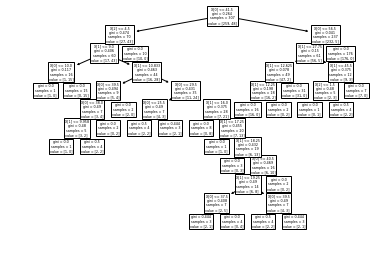

In [12]:
dt.visualize()